# Clustering con SciPy.clustering

En esta breve notebook se muestra un ejemplo de utilización del subpaquete clustering de SciPy.

Para la demostración se utilizará un dataset sobre diabetes publicado en Kaggle al que se accede a través de siguiente [enlace](
https://www.kaggle.com/datasets/saurabh00007/diabetescsv).


En primer lugar importo las librerías que voy a utilizar:

In [14]:
# Se importan los módulos
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import whiten, kmeans2

Luego, descargo del Repositorio Github el dataset y lo cargo en una matriz numpy:

In [15]:
!wget 'https://raw.githubusercontent.com/jumafernandez/elementos-computacion-unlu/main/data/diabetes.csv'

--2023-09-01 13:01:29--  https://raw.githubusercontent.com/jumafernandez/elementos-computacion-unlu/main/data/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23105 (23K) [text/plain]
Saving to: ‘diabetes.csv.2’

diabetes.csv.2      100%[===================>]  22.56K  --.-KB/s    in 0s      

2023-09-01 13:01:29 (102 MB/s) - ‘diabetes.csv.2’ saved [23105/23105]



Cargo el dataset eludiendo la primera fila:

In [16]:
dataset = np.loadtxt("diabetes.csv", delimiter=",", skiprows=1)

A continuación se excluye la columna de resultados (si la persona es diabética o no):

In [17]:
dataset = dataset[:, 0:8]

print("Data :\n", dataset, "\n")

Data :
 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 



Se normalizan los datos de todos los atributos (se llevan a una misma escala):

In [18]:
# Normalizo los datos a una misma escala
dataset = whiten(dataset)

dataset

array([[1.78179878, 4.63197751, 3.72223799, ..., 4.26448664, 1.89361441,
        4.25438766],
       [0.29696646, 2.66025735, 3.41205149, ..., 3.37605193, 1.06006166,
        2.63772035],
       [2.3757317 , 5.72737759, 3.30865599, ..., 2.95721842, 2.02951975,
        2.7228081 ],
       ...,
       [1.48483231, 3.78695458, 3.72223799, ..., 3.32528423, 0.73992908,
        2.55263259],
       [0.29696646, 3.94344031, 3.10186499, ..., 3.82026929, 1.05402142,
        3.9991244 ],
       [0.29696646, 2.91063452, 3.61884249, ..., 3.85834506, 0.95133738,
        1.95701832]])

Se calculan los clusters en función de un k (en este caso 2):

In [19]:
# Se asignan los centroides y los clusters a cada punto
centroids, clusters = kmeans2(dataset, 2, minit='random')


print("Dirección de los centroides: \n", centroids, "\n")

print("Cluster asignado a cada punto:\n", clusters, "\n")

Dirección de los centroides: 
 [[0.61682284 3.55905042 3.35322302 1.41106328 0.75613405 4.01057092
  1.43578157 2.24421106]
 [2.08308475 4.18630616 3.96587539 1.06797375 0.57951226 4.14993626
  1.4060135  3.8756698 ]] 

Cluster asignado a cada punto:
 [1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 

Se realiza un gráfico de torta para ver la proporción:

Pacientes diabéticos: 275
Pacientes no diabéticos : 493


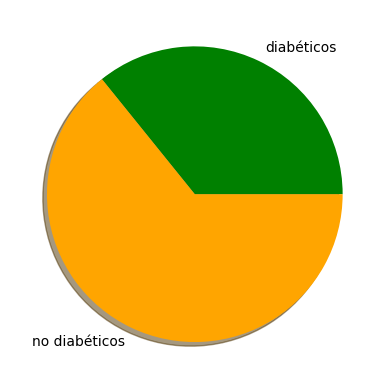

In [20]:
# count non-diabetic patients
non_diab = list(clusters).count(0)

# count diabetic patients
diab = list(clusters).count(1)

# depict illustration
x_axis = []
x_axis.append(diab)
x_axis.append(non_diab)

colors = ['green', 'orange']

print("Pacientes diabéticos: " + str(x_axis[0]) +
	"\nPacientes no diabéticos : " + str(x_axis[1]))

y = ['diabéticos', 'no diabéticos']

plt.pie(x_axis, labels=y, colors=colors, shadow='true')
plt.show()

Créditos: https://www.geeksforgeeks.org/k-means-clustering-with-scipy/
